# **Feature Selection and Dimensionality Reduction:** *Finding and choosing 'best features':*
## Dataset: Breast Cancer  
Feature selection with correlation (manually), univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization libraries 
import seaborn as sns  
import matplotlib.pyplot as plt
# change style and colours:
# custom_palette = sns.color_palette(["#4c72b0","#4c72b0","#55a868","#55a868","#c44e52","#c44e52"])
sns.set_theme(style="whitegrid", palette='tab10')

# Import ML modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import scipy.stats as stats

import time
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data.csv



# **Data Acquisition**

In [2]:
df = pd.read_csv('../input/data.csv')

Before beginning the feature selection,feature extraction and classification process, start with basic data analysis. 
Lets look at features of data.

In [3]:
pd.set_option('display.max_columns', 5000)
df.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### **Formatting**?
Column names and naming style appear to be consistent

### **What to clean?**
* 1) There is an **id** that cannot be used for classificaiton 
* 2) **Diagnosis** is our class label
* 3) **Unnamed: 32** feature includes NaN so we probably do not want it because we have an abundance of other features
* 4) We do not need medical knowledge about feature names **because machine learning is awesome :)**

Therefore, drop these unnecessary features. However do not forget this is not a feature selection. This is like browsing a pub, we haven't chosen our drink yet!

In [4]:
# feature names as a list
col = df.columns      # .column gives indices' names 
print(col)
col_arr = df.columns.values    # .column.values gives columns names as np array
print(col_arr)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'frac

In [5]:
list = ['Unnamed: 32','id']
df.drop(list,axis = 1, inplace =True)
X = df.drop('diagnosis', axis = 1)
y = df.diagnosis                          # M or B 
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Data Sampling**

In [6]:
# Split here before EDA to avoid 'peeking' into the test data
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rseed)
# Copy df of train data only (for EDA):
df_train = pd.DataFrame(data=pd.concat([y_train, X_train], axis=1), columns=df.columns.values)

In [7]:
# Here is how to factorize categorical variable to be compatible as both numerical and str
df_train['diagnosis'] = pd.factorize(df_train['diagnosis'])[0]
# or:
# df_train['diagnosis'] = df_train['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
# maybe we can use this later
df_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,0,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,0.2500,0.7574,1.573,21.47,0.002838,0.01592,0.01780,0.005828,0.01329,0.001976,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
124,0,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,0.1639,1.1400,1.223,14.66,0.005919,0.03270,0.04957,0.010380,0.01208,0.004076,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
421,0,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,0.5462,1.5110,4.795,49.45,0.009976,0.05244,0.05278,0.015800,0.02653,0.005444,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
195,0,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,0.1942,0.9086,1.493,15.75,0.005298,0.01587,0.02321,0.008420,0.01853,0.002152,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
545,0,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,0.3460,1.3360,2.066,31.24,0.005868,0.02099,0.02021,0.009064,0.02087,0.002583,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


# **EDA**
In order to visualizate data we are going to use seaborn plots that is not used in other kernels to inform you and for diversity of plots. What I use in real life is typically violin and swarm plot. Do not forget we are not selecting features yet, we are trying to get to know data like looking at a new drinks list at the pub door.

### Class Balance

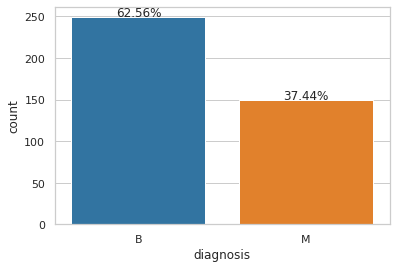

In [8]:
# Percentage countplot
ax = sns.countplot(x=y_train, label="Count")
for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_height() / len(X_train) * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() +1
    ax.annotate(percentage, (x, y), ha = 'center')

# B, M = y_train.value_counts()
# print('Number of Benign: ',B)
# print('Number of Malignant : ',M)
## or simply:
# print("\n Perhaps find this easier:", df_train.groupby('diagnosis').size())

In [9]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Okay, now we have features but **how much do we need to know about these features**.
The answer is that we do not need to know meaning before you know the contributions of these features.
These type of information helps to understand about what is going on data. A salient observation is the **area_mean** feature's max value is 2500 and **smoothness_mean** features' max 0.16340. Therefore, **we need to scale our data at some stage if we want it to work across different classifiers, especially distance-based ones like SVM, NN, k-NN etc.**

## **Scaled EDA**

### According to describe, differences between values of features are very high to observe on plots. Before violin and swarm plot, scale X using **standardization** or **normalization**. Plot features in 3 group and each group includes 10 features to observe better.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

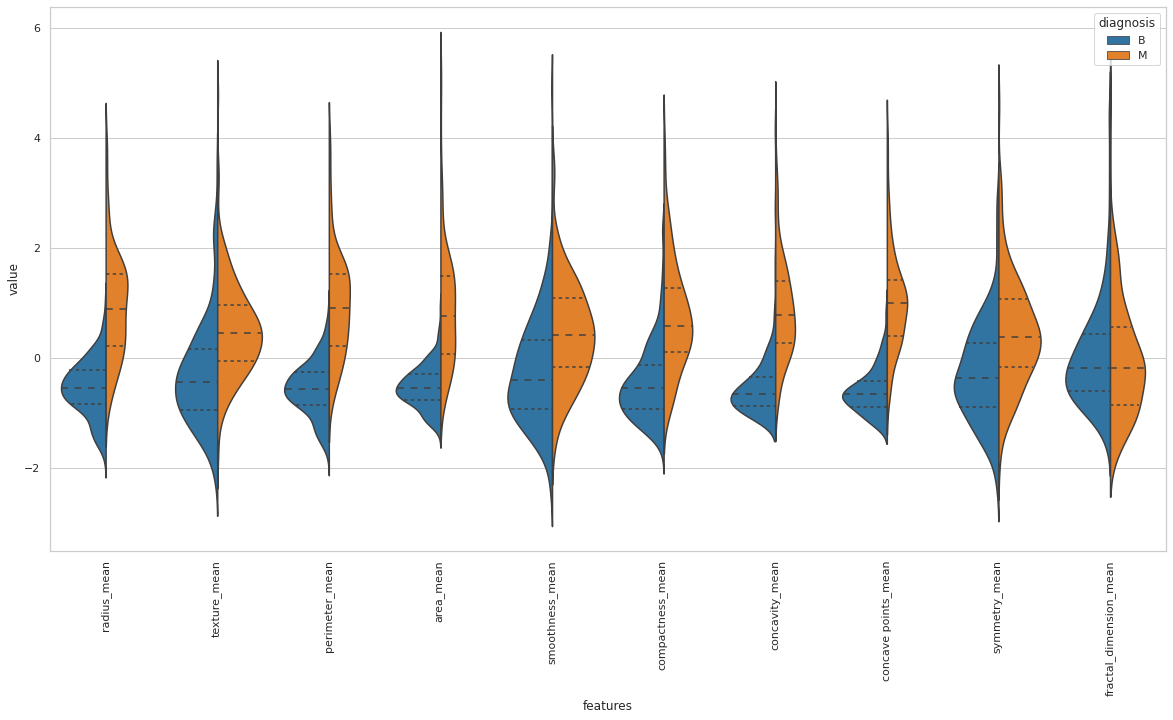

In [10]:
X_train_scaled = (X_train - X_train.mean()) / (X_train.std())                      # standardization
X_test_scaled = (X_test - X_test.mean()) / (X_test.std())                      # standardization
# X_train_scaled = (X_train - X_train.min()) / (X_train.max() - X_train.min())     # minmax normalization
# X_test_scaled = (X_test - X_test.min()) / (X_test.max() - X_test.min())     # minmax normalization
df_train_scaled = pd.concat([y_train, X_train_scaled],axis=1)
                        
# first ten features
melted_df = pd.melt(df_train_scaled.iloc[:,0:11],id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=melted_df,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'texture_se'),
  Text(1, 0, 'perimeter_se'),
  Text(2, 0, 'area_se'),
  Text(3, 0, 'smoothness_se'),
  Text(4, 0, 'compactness_se'),
  Text(5, 0, 'concavity_se'),
  Text(6, 0, 'concave points_se'),
  Text(7, 0, 'symmetry_se'),
  Text(8, 0, 'fractal_dimension_se')])

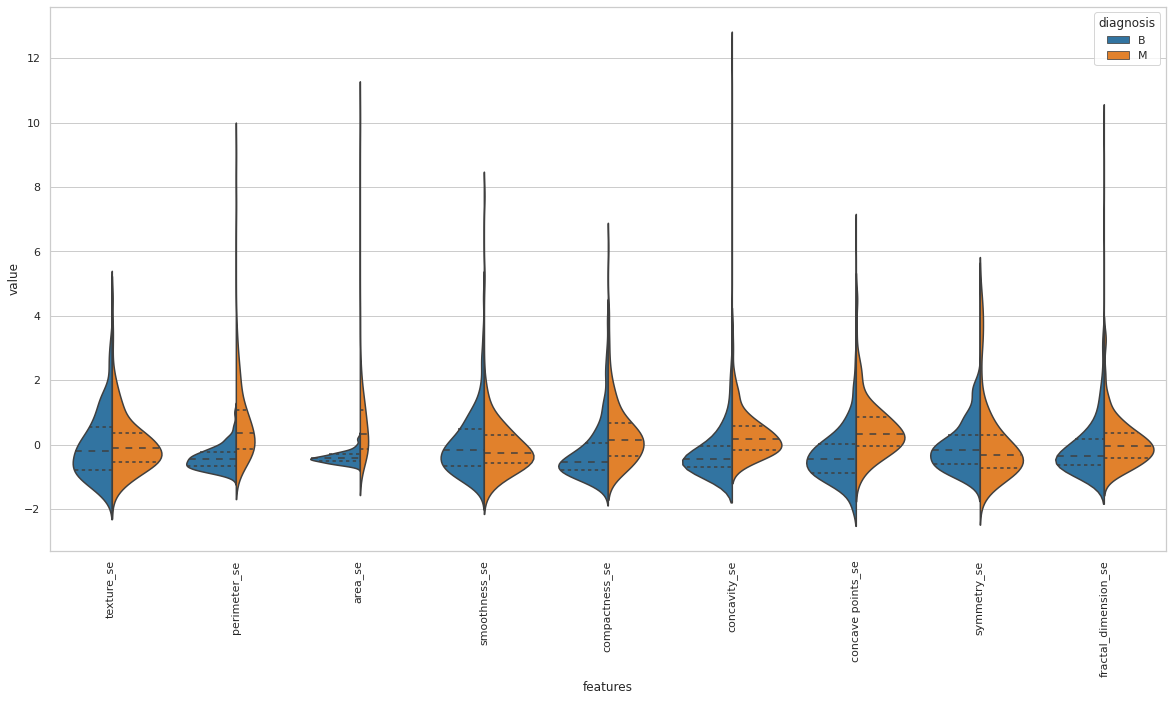

In [11]:
# Second ten features
df_train_scaled2 = pd.concat([y_train, X_train_scaled.iloc[:,11:20]],axis=1)
melted_df2 = pd.melt(df_train_scaled2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=melted_df2,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

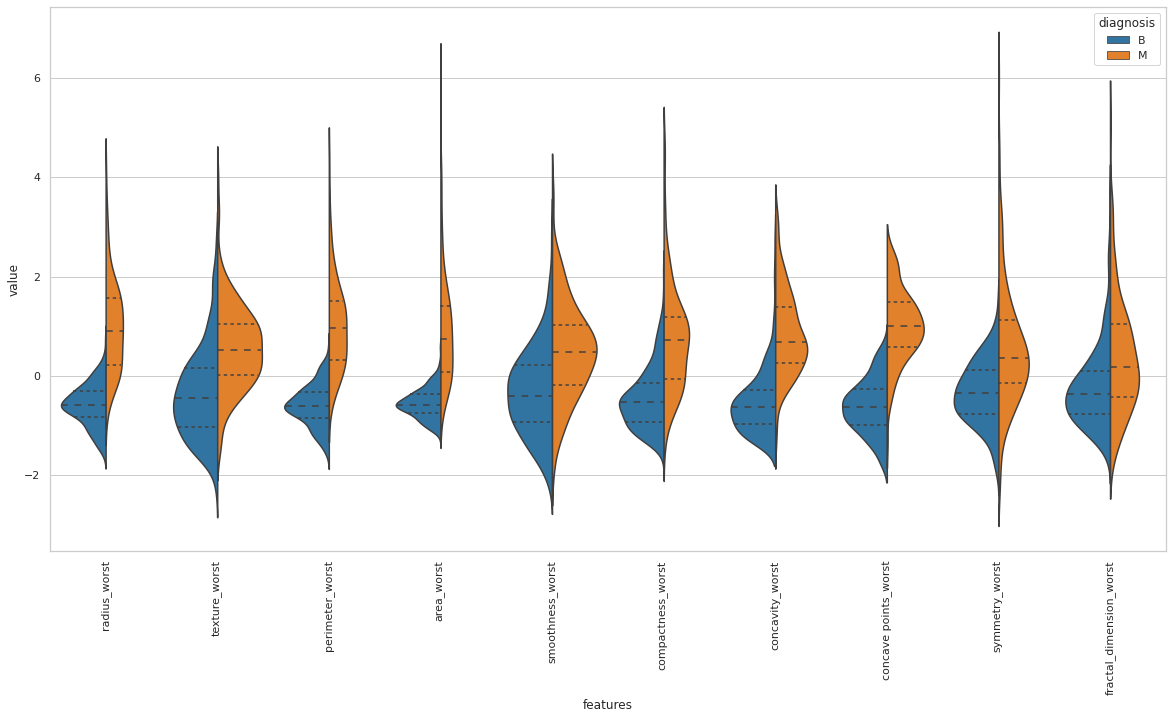

In [12]:
# Third ten features
df_train_scaled3 = pd.concat([y_train, X_train_scaled.iloc[:,20:31]],axis=1)
melted_df3 = pd.melt(df_train_scaled3, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=melted_df3,split=True, inner="quart")
plt.xticks(rotation=90)

## **Violin plot analysis:**
### In **texture_mean** feature, median of the *Malignant* and *Benign* are separated so probably good for classification. However, in **fractal_dimension** features,  median of the *Malignant* and *Benign* are not separated.

## **Box Plot**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

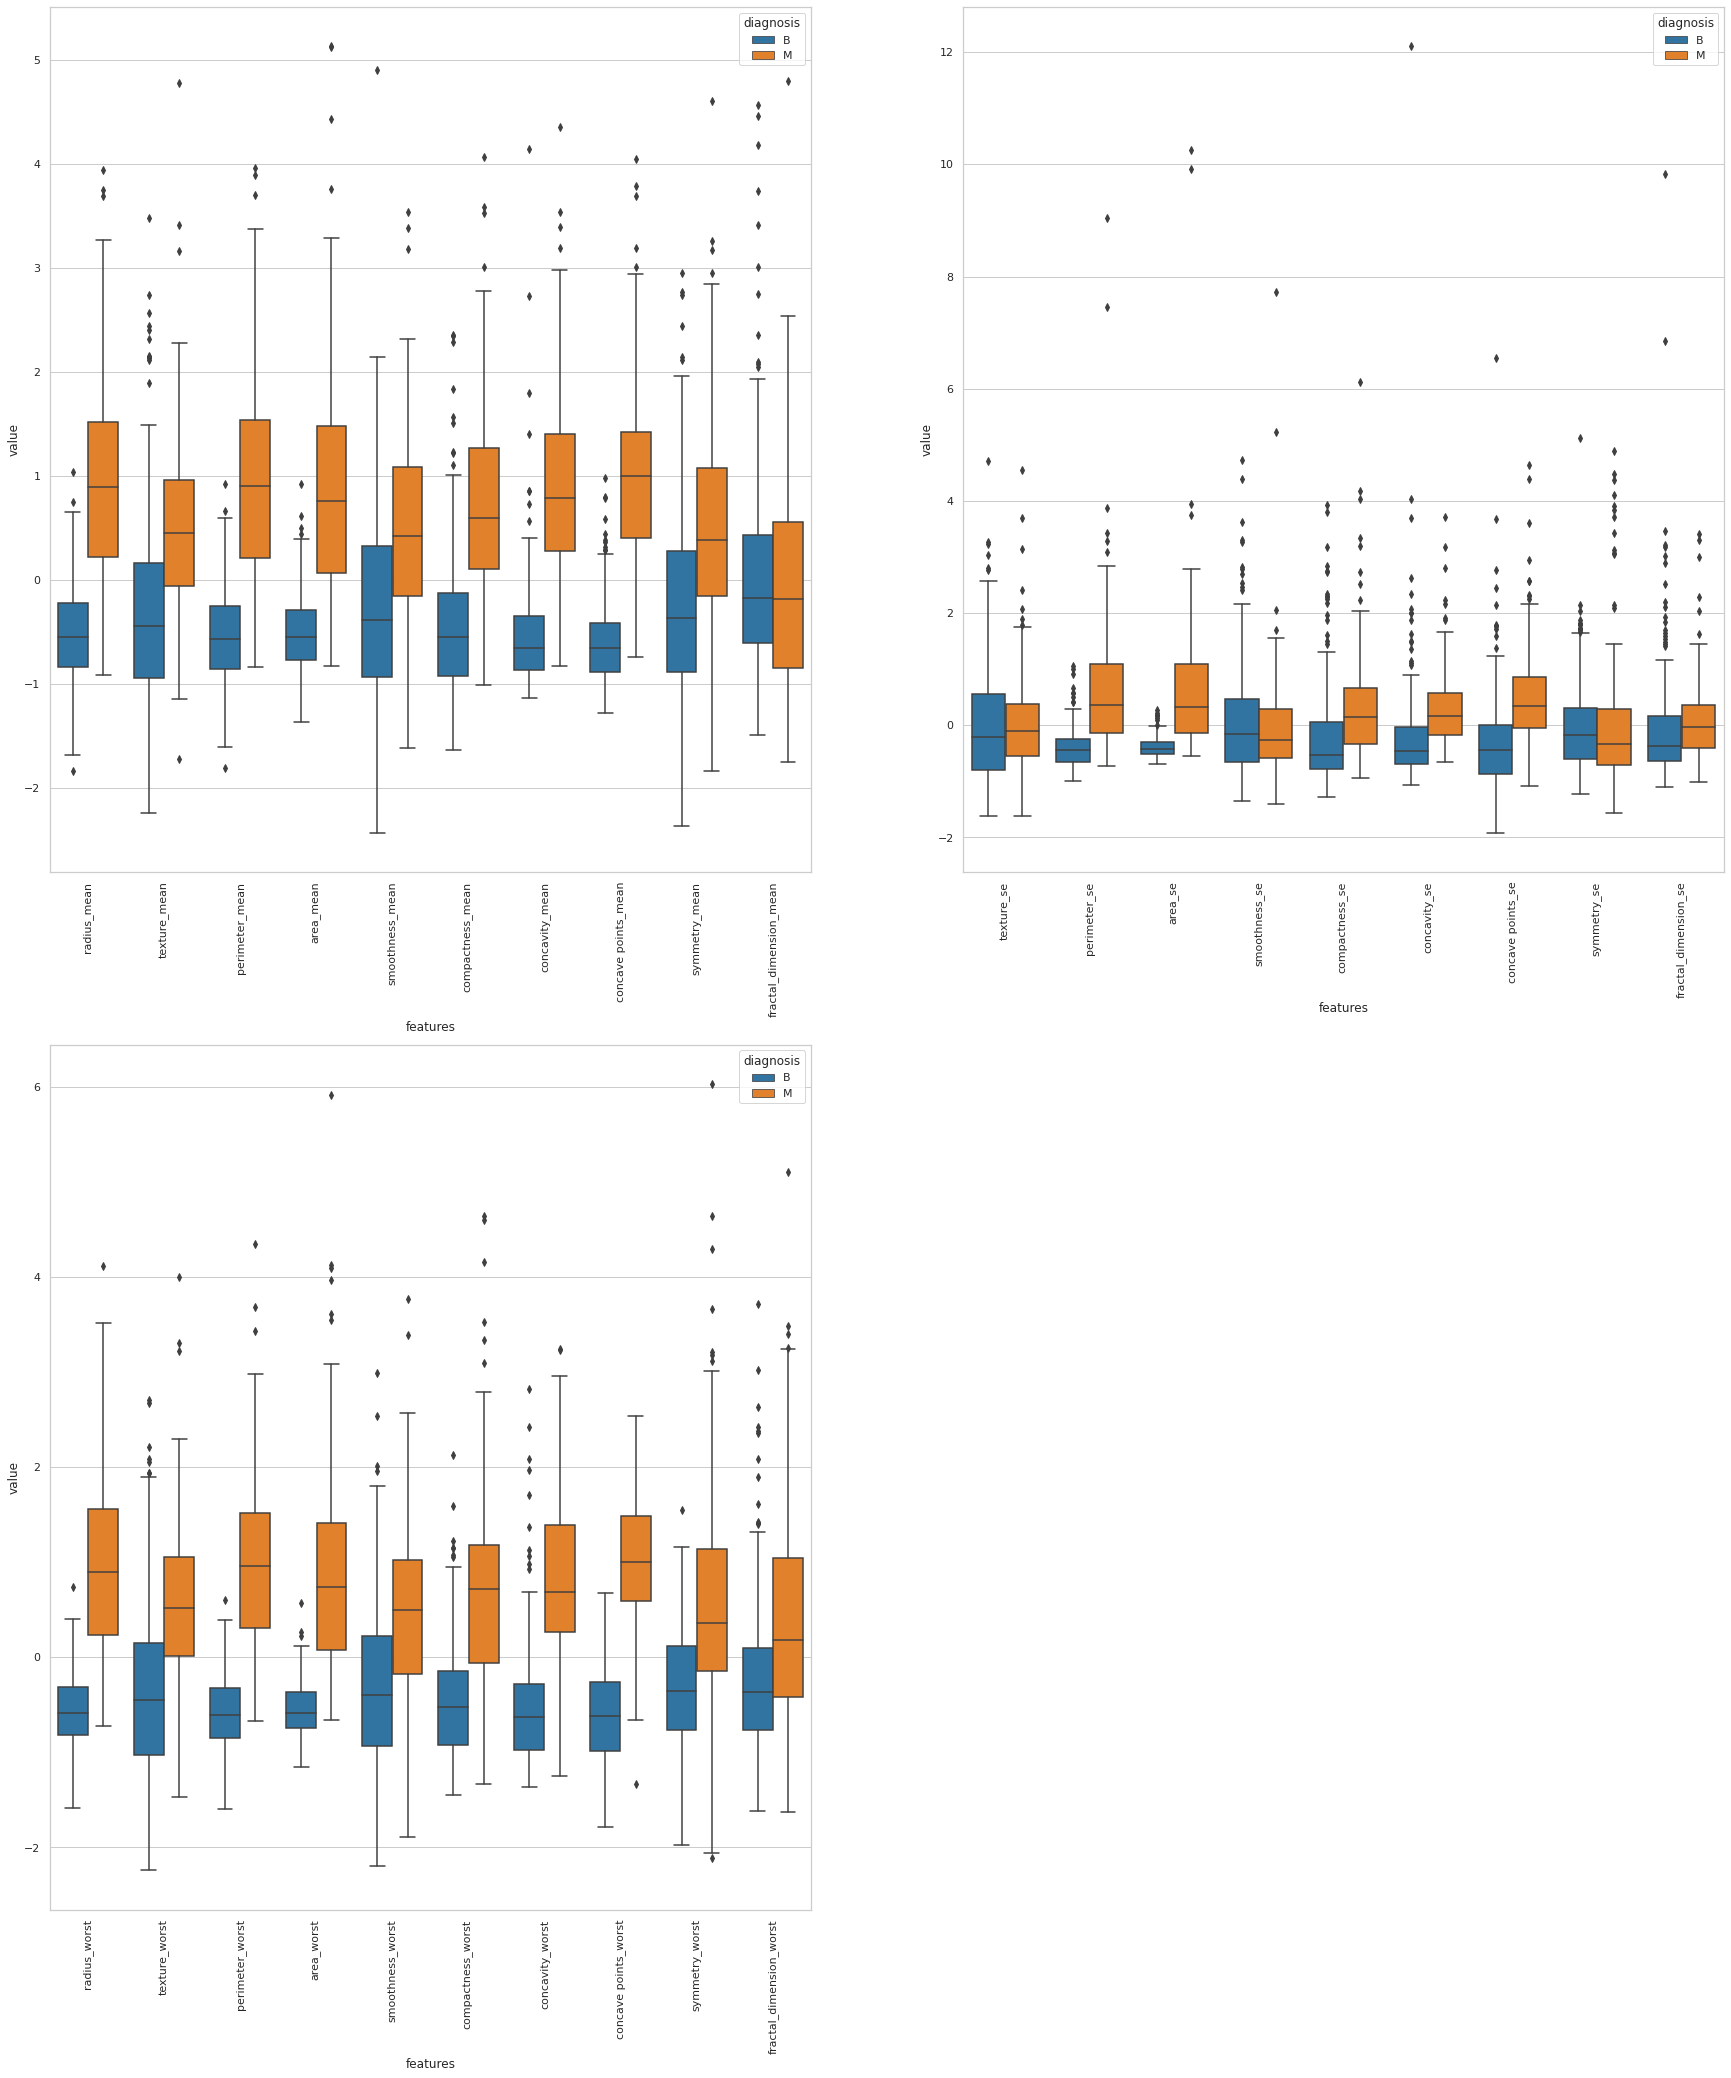

In [13]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
plt.figure(figsize=(30,35))
plt.subplot(2,2,1)
sns.boxplot(x="features", y="value", hue="diagnosis", data=melted_df)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x="features", y="value", hue="diagnosis", data=melted_df2)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x="features", y="value", hue="diagnosis", data=melted_df3)
plt.xticks(rotation=90)

# X_train.boxplot()


## **Box plot analysis:**
### Again, the box plot illustrates that fractal dimension is not as good at classifying cancer cells as the other features in the dataset.

### Box plots also allow us to analyse the outliers in our dataset but let's ignore this problem for now.

Lets interpret one more thing about plot above, variable of **concavity_worst** and **concave point_worst** looks like similar but how can we decide whether they are correlated with each other or not.
(Not always true but, basically if the features are correlated with each other we can drop one of them)

## **Univariate Histogram plot:**
<!-- ### On unscaled data, shows that several conform to a Gaussian-like distribution -->

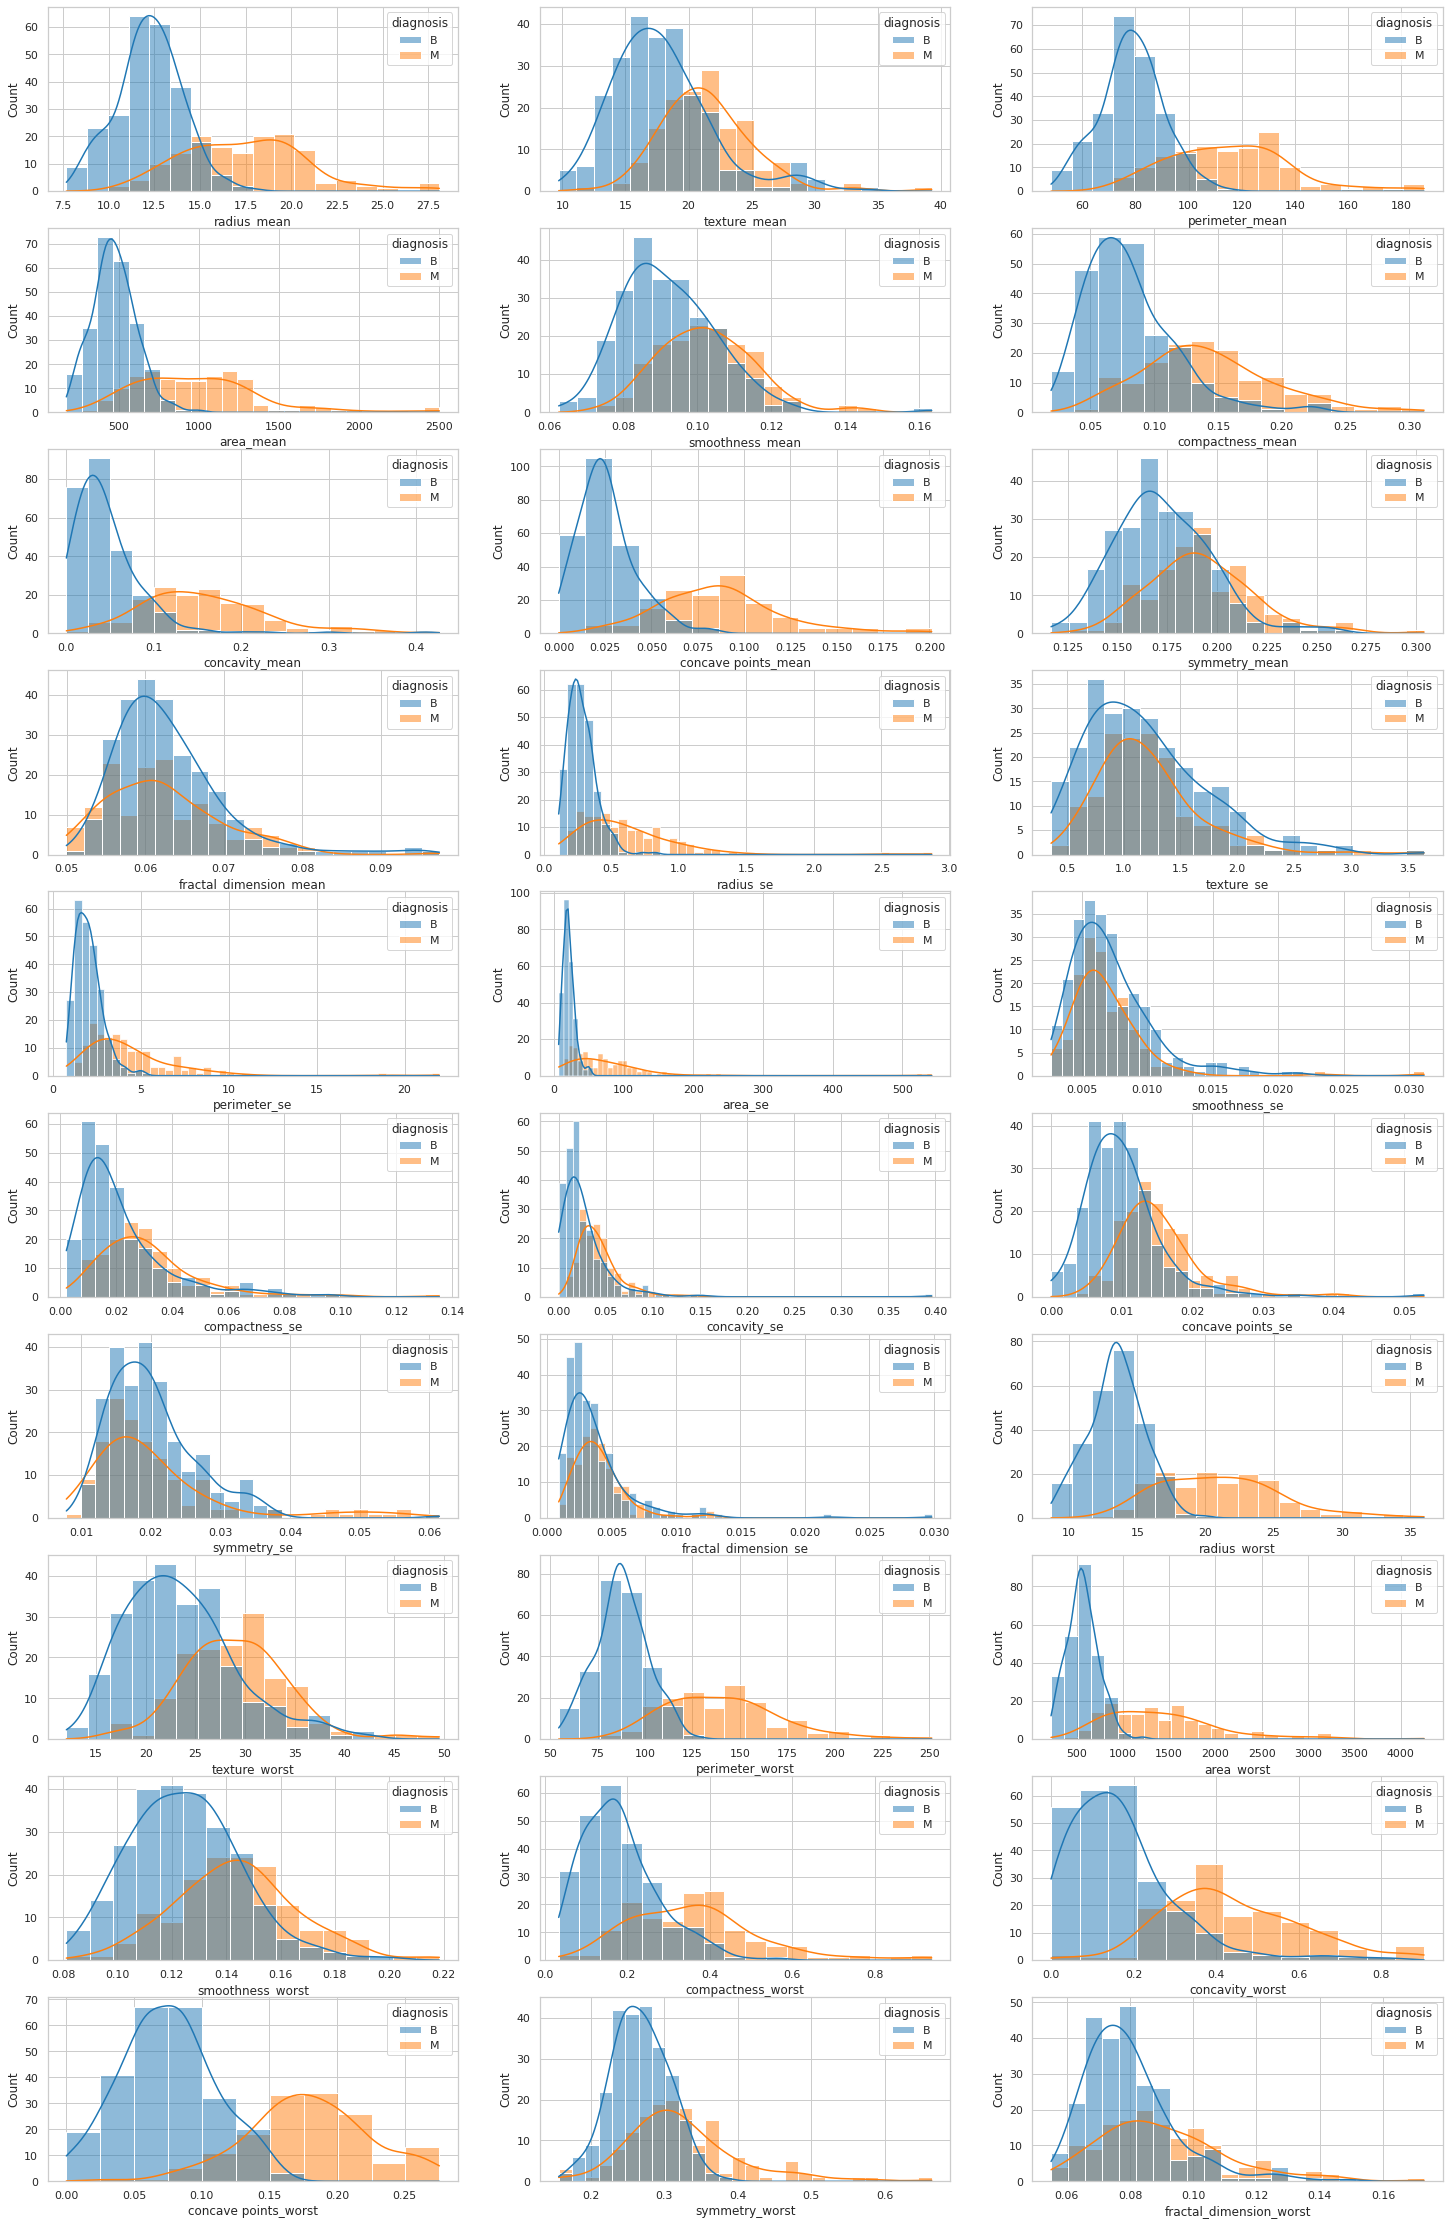

In [14]:
# contrast classes with input variables
# df_M = df_train[df_train['diagnosis']==0] #remember this if you want to select or exclude certain classes

plt.figure(figsize=(25,40))
for i in range (1, 31):
    plt.subplot(10,3,i)
    sns.histplot(data = df_train, x = df_train.iloc[:,i:i+1].columns[0], kde=True, hue=y_train)
#     sns.kdeplot(data = df_train, x = df_train.iloc[:,i:i+1].columns[0], hue=y_train)
# or easy:
# df_train.hist()
# his = plt.gcf()
# his.set_size_inches(30, 20)


## **Scatter plots**

### **Joint plot:**
In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated.
 Pearsonr value measures correlation and 1 is the highest. Therefore, 0.86 looks enough to say that they are correlated. 
Pearsonr assumes a normal distribution

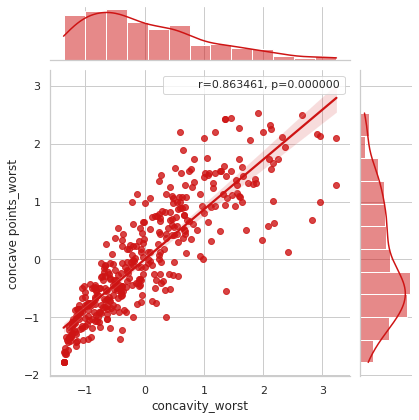

In [15]:
# plot and store
jp = sns.jointplot(x='concavity_worst', y='concave points_worst', data=df_train_scaled, kind="reg", color="#ce1414")

# get pearsonr stats
r, p = stats.pearsonr(df_train_scaled.loc[:,'concavity_worst'], df_train_scaled.loc[:,'concave points_worst'])
# annotate
phantom, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
jp.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

## **Single Pair plot with KDE**

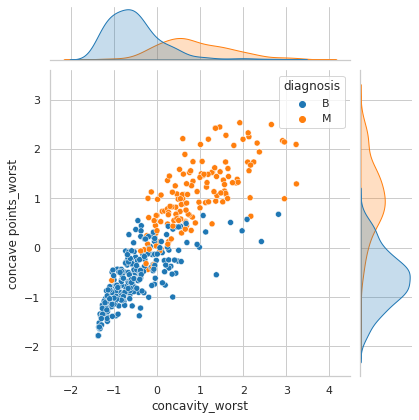

In [16]:
sns.jointplot(x="concavity_worst", y="concave points_worst", hue="diagnosis", data=df_train_scaled)

### **Pairgrid plot:**

What about three or more features for comparision? For this purpose we can use pair grid plot.

## what does the graph tell us about the three features?

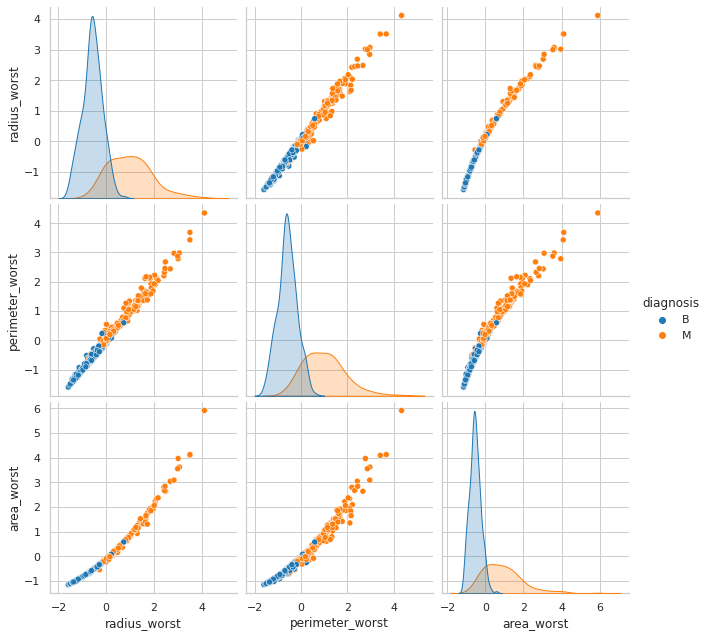

In [17]:
df_pair = df_train_scaled.loc[:,['diagnosis', 'radius_worst','perimeter_worst','area_worst']]
# g = sns.PairGrid(df_pair)
# g.map_lower(sns.kdeplot)
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot, lw=3)

# or simply :)
sns.pairplot(df_pair, hue = 'diagnosis', height = 3)

## **Pair grid analysis:**
And we discover one more thing **radius_worst**, **perimeter_worst** and **area_worst** are correlated as it can be seen pair grid plot. Important discoveries for feature selection.

## **Extra: Variable Inflation Factor (VIF)**

In [18]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def calc_vif(X, features):
#     """Calculating VIF""" 
#     vif = pd.DataFrame()
#     vif["variables"] = features
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif

# calc_vif(X=X_train, features=['radius_worst','perimeter_worst','area_worst'])

## **Swarm plot**
Similar to violin plots, a three part swarm plot for better readability

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; yo

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

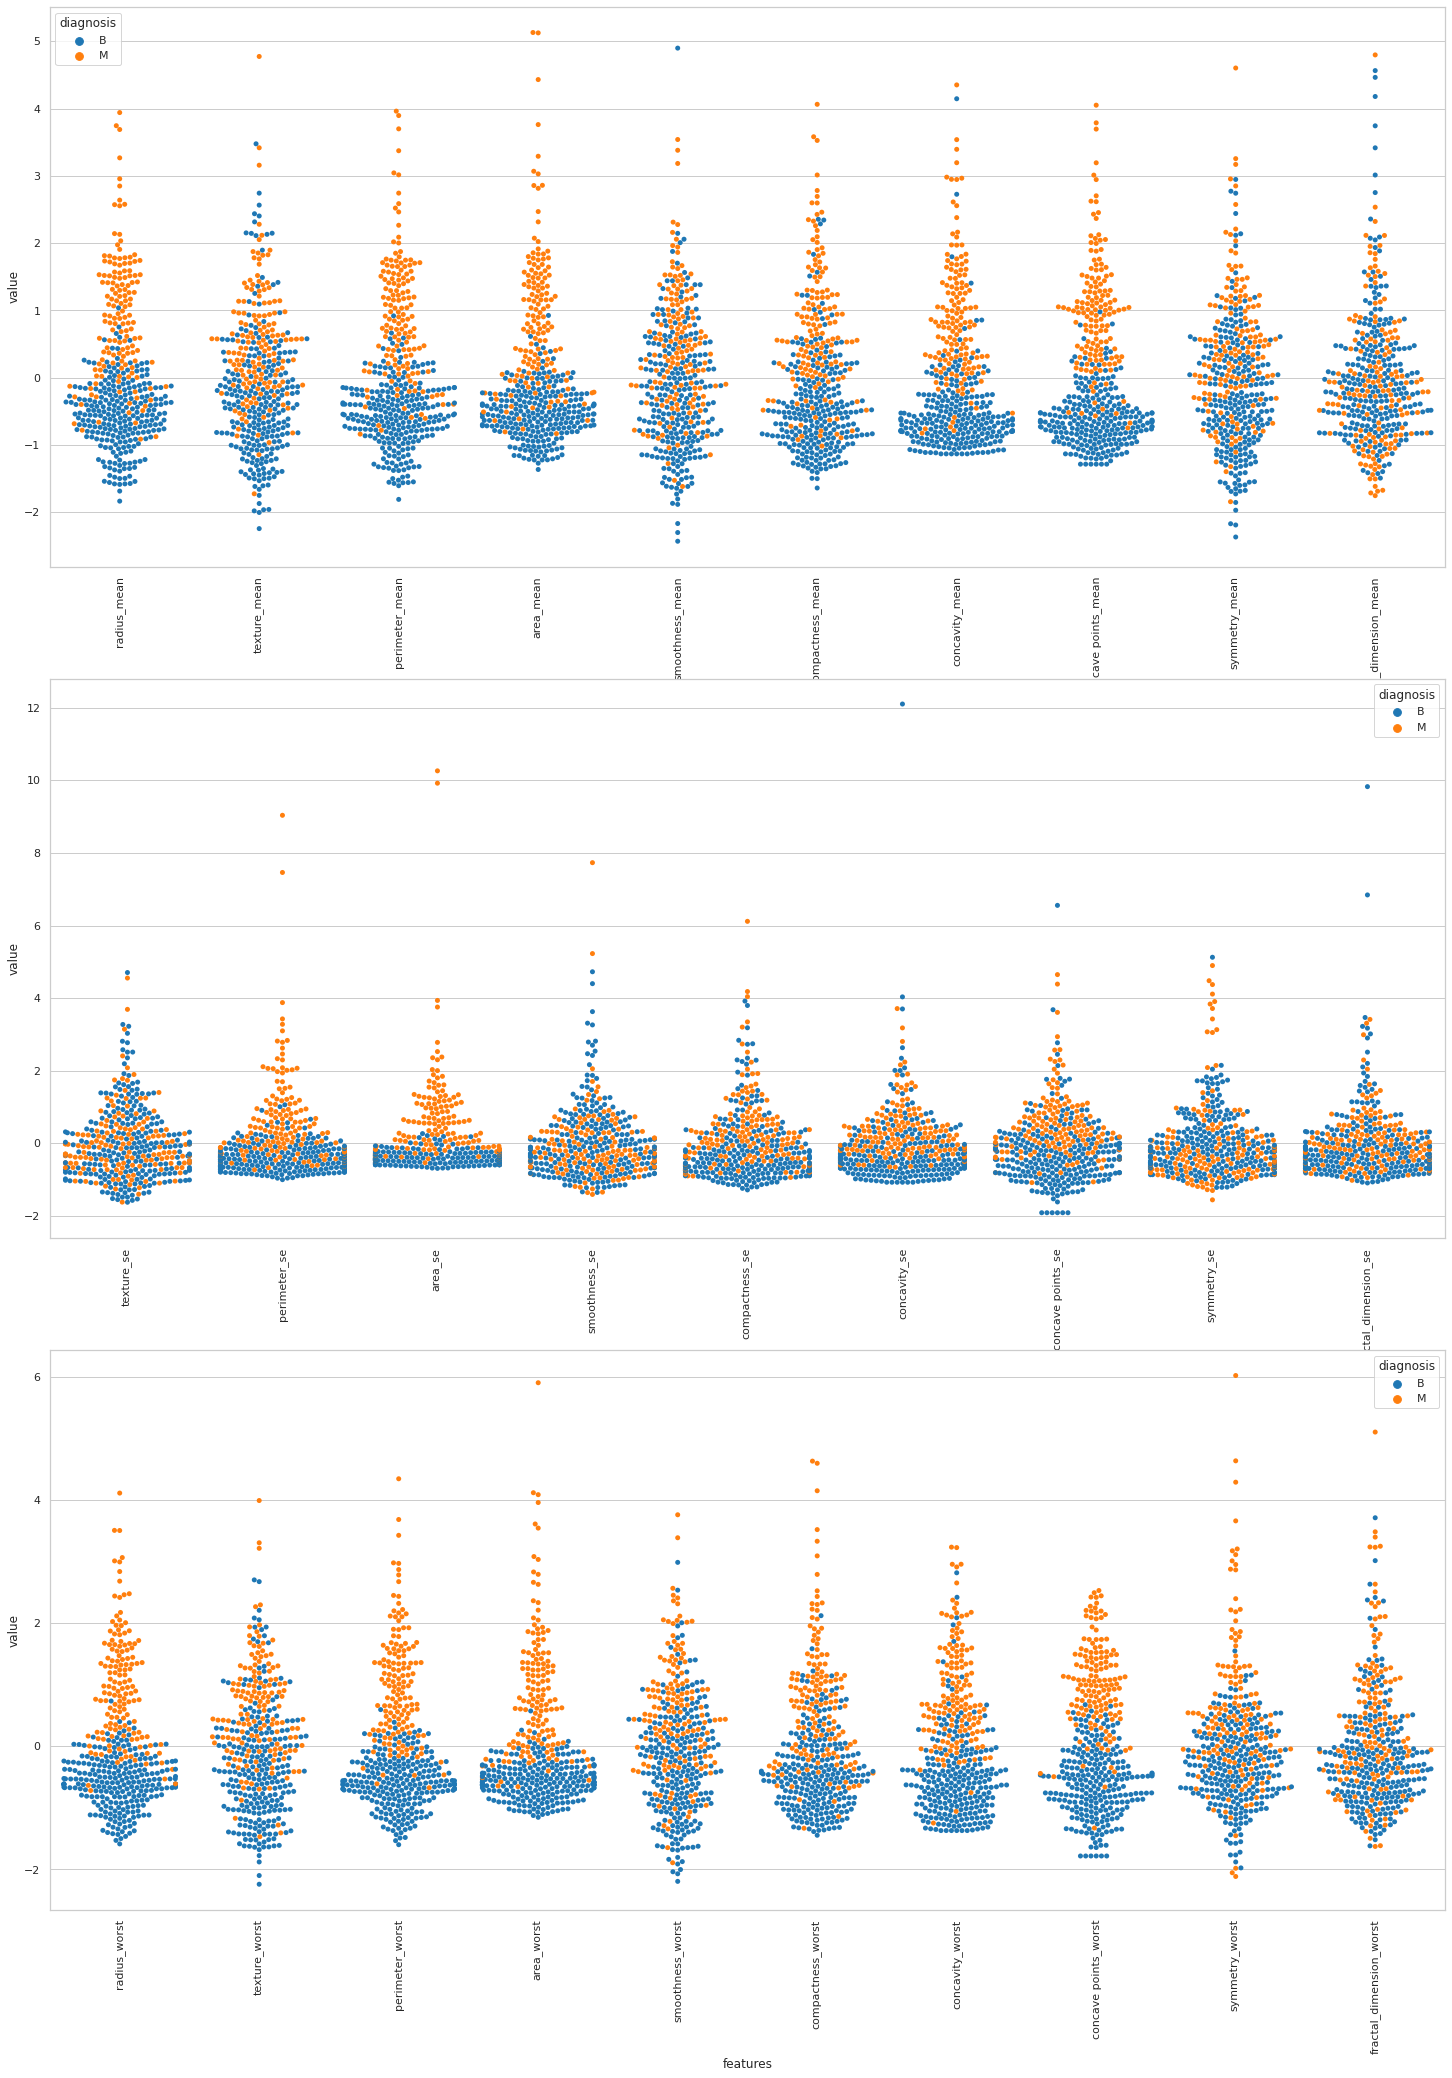

In [19]:
tic = time.time()

plt.figure(figsize=(25,35))
plt.subplot(3,1,1)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=melted_df)
plt.xticks(rotation=90)

plt.subplot(3,1,2)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=melted_df2)
plt.xticks(rotation=90)

plt.subplot(3,1,3)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=melted_df3)
plt.xticks(rotation=90)


They looks cool right. And you can see variance more clear. In these three plots which **feature looks like more clear in terms of classification.** 
* **area_worst**? in last swarm plot looks like malignant and benign are mostly separated. However, **smoothness_se** and several others in Swarmplot 2 malignant and benign are mixed

## **Correlation matrix**
**What if we want to observe all correlation between features?** The answer is a heatmap that is old but powerful stats tool. Look at radius, perimeter and area; it is expected right?

### **Correlation with target:** *Finding variables that best separate target class (useful for binary class problems)*
##### Remember the first few plots? 
* Now we can see give a number to how much an input variable correlates with the target class
* Recommended to factorize the target class if it is non-numerical

In [20]:
# compute correlation matrix using pandas corr() function
corr_df =  df_train.corr() 
# display first few rows/columns of correlation matrix using iloc fucntion in Pandas
corr_df.iloc[0:,0:1].sort_values(by=['diagnosis'], key=abs, ascending=False)


,diagnosis
diagnosis,1.000000
concave points_worst,0.791089
concave points_mean,0.780350
perimeter_worst,0.770895
radius_worst,0.761693
perimeter_mean,0.726666
area_worst,0.715231
radius_mean,0.712933
concavity_mean,0.691392
area_mean,0.688087


##### **Correlation Analysis:** concave points look like a good features and the bottom five appear to be bad features

### **Correlation Map:** *Finding multicollinearity*
First column includes the previously shown correlation with target (which should be high)

<AxesSubplot:>

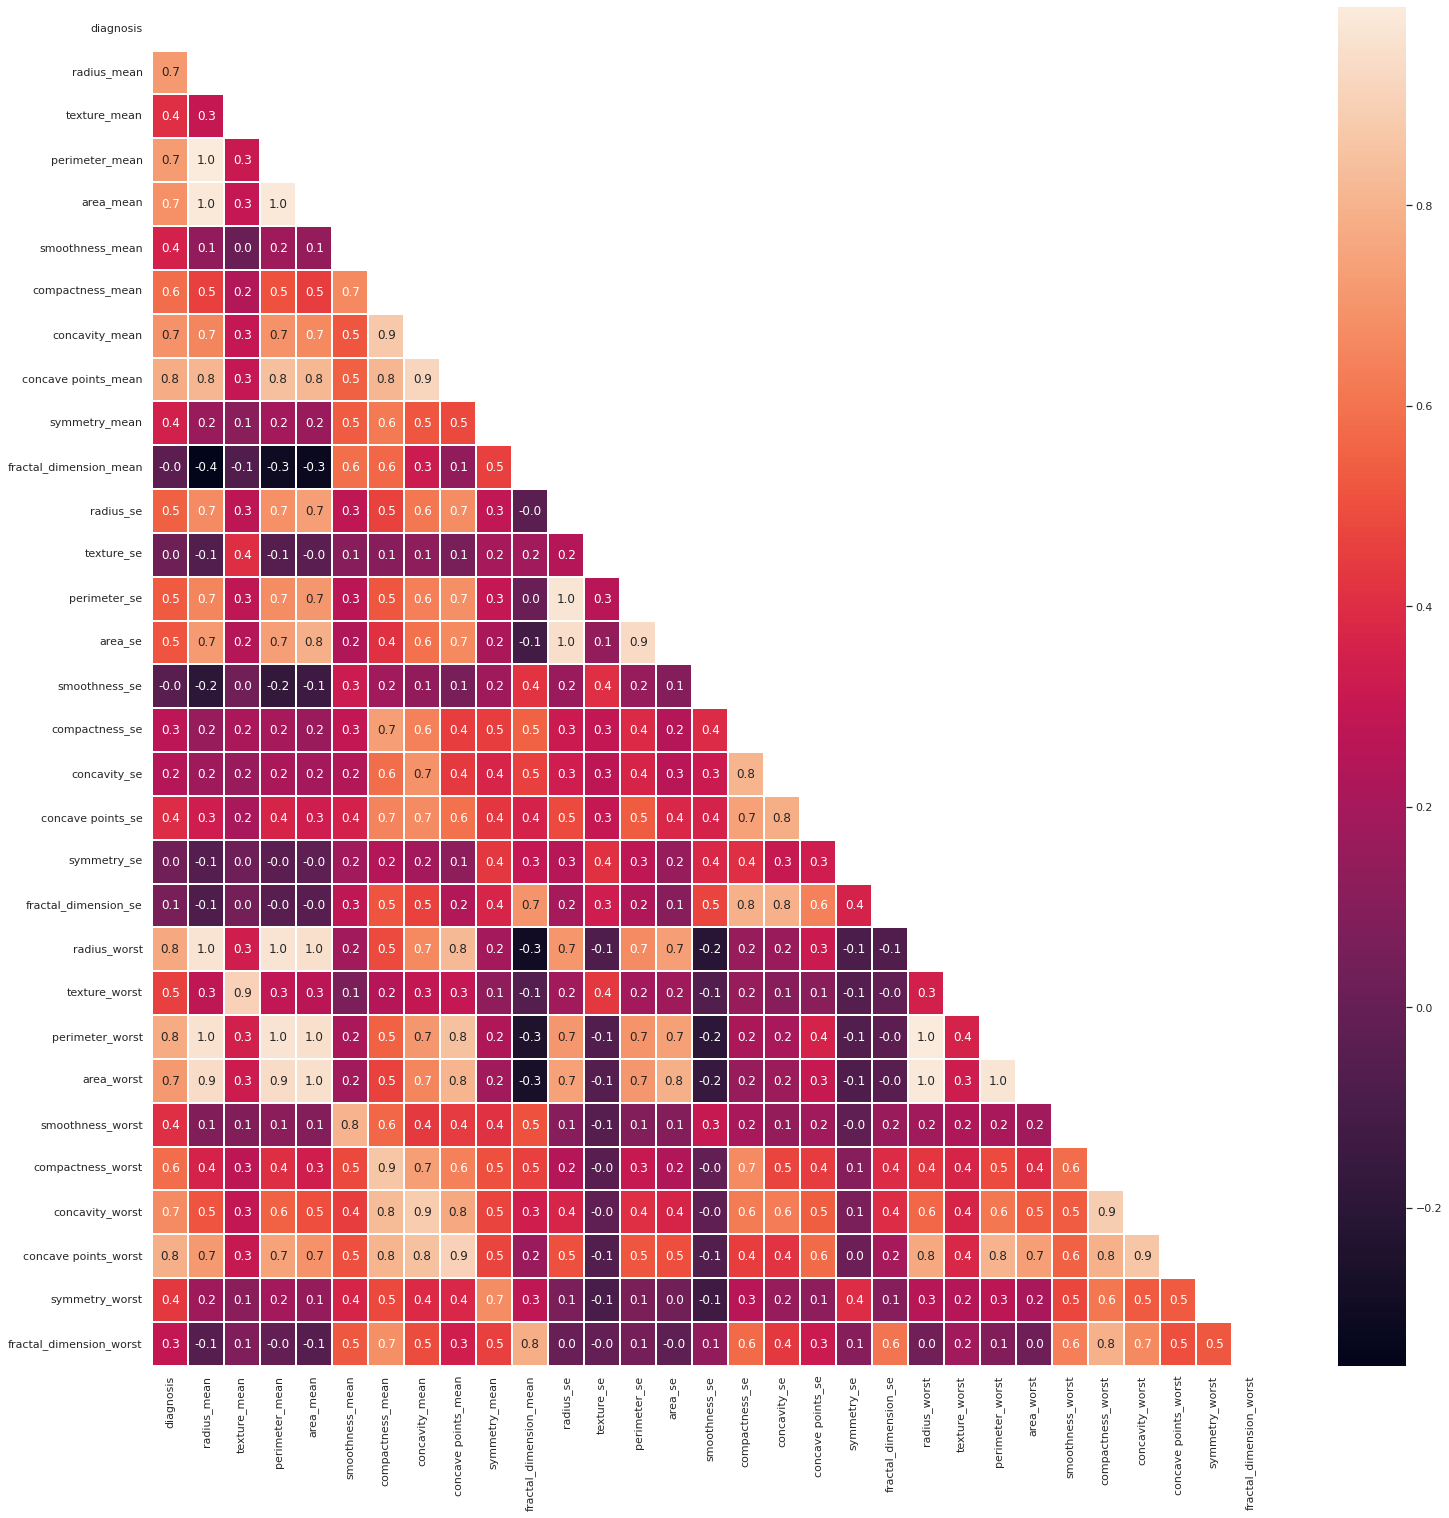

In [21]:
f,ax = plt.subplots(figsize=(25, 25))

# Getting the Upper Triangle of the co-relation matrix
sns.heatmap(corr_df, annot=True, linewidths=.1, fmt= '.1f',ax=ax, mask=np.triu(corr_df))

### **Multicollinearity:** *the worst offenders (high overlap between input features)*

In [22]:
# Fixme: help me, my cs students... this used to work
# df_train_scaled[df_train_scaled.columns[1:]].corr()['diagnosis'][:].sort_values(ascending=False).to_frame()
# corr_df[corr_df>=0.8]

# def corrFilter(x: pd.DataFrame, bound: float):
#     xCorr = x.corr()
#     xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
#     xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
#     return xFlattened

# corrFilter(df_train_scaled, 0.8)

thresh = 0.8
# Create correlation matrix
corr_matrix = df_train_scaled.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than ...
to_drop_corr = [column for column in upper.columns if any(upper[column] > thresh)]
to_drop_corr

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

## **Variance Threshold:**
Correlation map giving you a headache? Only the strong survive. 

### Check which features are the weakest

In [23]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.0001) #Removing both constant and quasi-constant
var_thr.fit(X_train)
var_thr.get_support()
to_drop_varThresh = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]
to_drop_varThresh

['fractal_dimension_mean',
 'smoothness_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se']

### but VarianceThreshold ignores both the target variable and input variables as it only looks at univariate variance

# **Feature Scaling**

Oh but it is a non-distance based algorithm!

In [24]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.model_selection import cross_val_score, KFold

# scaler = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=rseed))

# scaler = make_pipeline(StandardScaler())
# X_train_sc = pd.DataFrame(data=scaler.fit_transform(X_train, y_train), columns=X_train.columns)
# X_test_sc = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
# print("Scaled!")

# **Feature Selection and Random Forest Classification**
Our purpose right now is to try new cocktails and experiencing different tastes. Therefore, we need to compare ingredients of drinks. There are various ways to achieve this:

In this part we will select feature with different algorithms that **automate the process.**
* 0) feature selection with correlation
* 1) univariate feature selection 
* 2) recursive feature elimination (RFE)
* 3) recursive feature elimination with cross validation (RFECV) 
* 4) tree based feature selection. We will use random forest classification in order to train our model and predict.
* Explore the rest on your own https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

## **0) Feature selection with correlation (handpick) and random forest classification**

As it can be seen in map heat figure **radius_mean, perimeter_mean and area_mean** are correlated with each other so we will use only **area_mean**. If you ask how i choose **area_mean** as a feature to use, well actually there is no correct answer, I just look at swarm plots and **area_mean** looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier. 

* **Compactness_mean, concavity_mean** and **concave points_mean** are correlated with each other. Only choose **concavity_mean**. 
* Apart from these, **radius_se, perimeter_se** and **area_se** etc. are correlated due to obvious reasons. Only use **area_se**. 
* **area_worst** and **area_mean** are also correlated; use **area_mean**.
* **radius_worst, perimeter_worst** and **area_worst** are correlated; use **area_worst**.  
* **Compactness_worst, concavity_worst** and **concave points_worst**; use **concavity_worst**.  
* **Compactness_se, concavity_se** and **concave points_se**; use **concavity_se**. 
* **texture_mean** and **texture_worst** are correlated; use **texture_mean**.

### but this is crazy, guessy and not feasible with so many features, especially with real data. Perhaps there is a better way to experience such a large variety?

In [25]:
# drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
drop_list = to_drop_corr #automatically generate list of features to drop from corr matrix
# drop_list = to_drop_varThresh #automatically generate list of weak features to drop
X_1_train = X_train.drop(drop_list,axis = 1 )        # do not modify X, we will use it later 
X_1_test = X_test.drop(drop_list,axis = 1 )        # do not modify X, we will use it later 
X_1_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
149,13.74,17.91,0.07944,0.06376,0.1473,0.05580,0.2500,0.7574,0.002838,0.01592,0.005828,0.01329,0.001976,0.2350,0.07014
124,13.37,16.39,0.07115,0.07325,0.1422,0.05823,0.1639,1.1400,0.005919,0.03270,0.010380,0.01208,0.004076,0.2048,0.07628
421,14.69,13.98,0.10310,0.18360,0.2086,0.07406,0.5462,1.5110,0.009976,0.05244,0.015800,0.02653,0.005444,0.2827,0.09208
195,12.91,16.33,0.07941,0.05366,0.1829,0.05667,0.1942,0.9086,0.005298,0.01587,0.008420,0.01853,0.002152,0.3024,0.06949
545,13.62,23.23,0.09246,0.06747,0.1664,0.05801,0.3460,1.3360,0.005868,0.02099,0.009064,0.02087,0.002583,0.2642,0.06953


tp* After dropping correlated features, the figure confirms it below. There is still one highly correlated variable 0.9 (top right) but lets see if we do not drop it.
* Variables with 0.7 and 0.8 are also arguably correlated enough to drop but let's not go down that additional rabbit hole and instead use **Automated ML techniques**!

<AxesSubplot:>

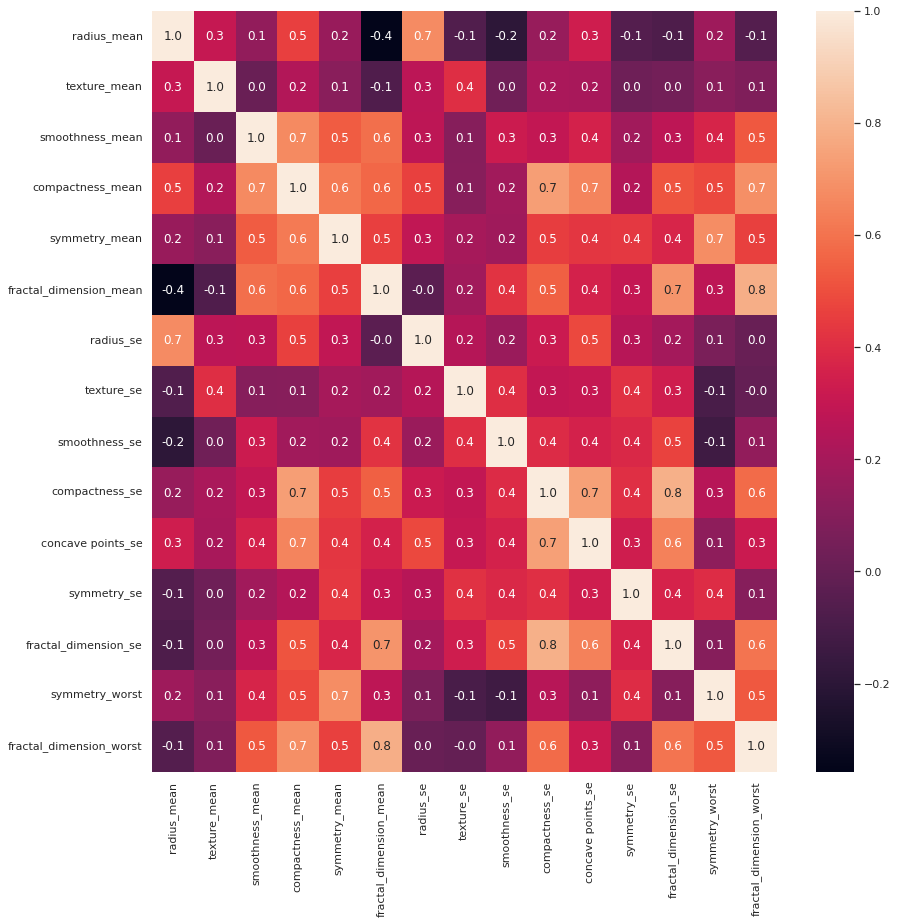

In [26]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1_train.corr(), annot=True, fmt= '.1f',ax=ax)

Well, we choose our features but **did we choose correctly ?** Lets use random forest and find accuracy according to chosen features.

Accuracy is:  0.9707602339181286
Accuracy confirmed! : 97.07602339181285
precision : 96.7741935483871
recall : 95.23809523809523


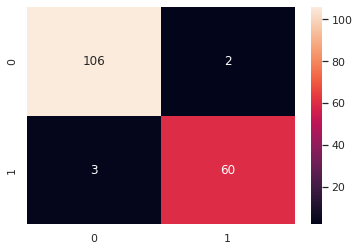

In [27]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=rseed)      
clr_rf = clf_rf.fit(X_1_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_1_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_1_test))
sns.heatmap(cm,annot=True,fmt="d")

# Confirm:
tn, fp, fn, tp = cm.ravel()
accuracy = np.sum(tp + tn) / (tn + fp + fn + tp)
print('Accuracy confirmed! :', accuracy*100)
precision = tp / (tp + fp)
print('precision :', precision*100)
recall = tp / (tp + fn)
print('recall :', recall*100)

* Accuracy is high as it can be seen in confusion matrix, a few wrong predictions.
* **But arguably recall is most important in medical diagnoses**
* So what features are actually the best... application dependent... what is your evaluation metric.. think about this for your project

## Now let's see automated feature selection methods to find better results and without squeezing eyeballs.

## **1) Univariate feature selection and random forest classification**
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest>

 SelectKBest will compute the chi2 statistic (by default) between each feature of X and y (assumed to be class labels). A small value will mean the feature is independent of y.

In this method we must choose how many features to keep. For example, will k (number of features) be 5 or 10 or 15? The answer is trial and error but can be automated with a loop. After systematically iterating through values I select the best result.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
# find best scored 10 features
select_feature = SelectKBest(score_func=chi2, k=12).fit(X_train, y_train) #note chi2 only works on non-negative data (you can use MaxAbsScale to ensure)

In [29]:
cols = select_feature.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
# pd.DataFrame(data= pd.DataFrame(select_feature.scores_))
# pd.DataFrame(data= select_feature.scores_, columns= features_df_new.columns.values)
features_df_new

,radius_mean,texture_mean,perimeter_mean,area_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst
149,13.740,17.91,88.12,585.0,0.2500,1.5730,21.47,15.340,22.46,97.19,725.9,0.15640
124,13.370,16.39,86.10,553.5,0.1639,1.2230,14.66,14.260,22.75,91.99,632.1,0.33080
421,14.690,13.98,98.22,656.1,0.5462,4.7950,49.45,16.460,18.34,114.10,809.2,0.32190
195,12.910,16.33,82.53,516.4,0.1942,1.4930,15.75,13.880,22.00,90.81,600.6,0.17640
545,13.620,23.23,87.19,573.2,0.3460,2.0660,31.24,15.350,29.09,97.58,729.8,0.10490
...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.5262,3.1680,25.44,9.733,15.67,62.56,284.4,0.14340
106,11.640,18.33,75.17,412.5,0.3060,2.1550,20.62,13.140,29.26,85.51,521.7,0.28730
270,14.290,16.82,90.30,632.6,0.1302,0.8439,10.77,14.910,20.65,94.44,684.6,0.03866
435,13.980,19.62,91.12,599.5,0.2208,1.6020,18.85,17.040,30.80,113.90,869.3,0.40690


Note the best 5 feature to classify is that **area_mean, area_se, texture_mean, concavity_worst and concavity_mean** in the original article

Accuracy is:  0.9766081871345029


<AxesSubplot:>

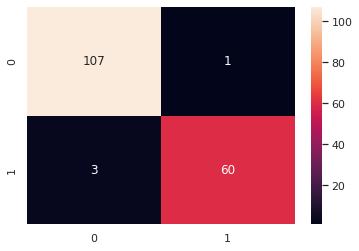

In [30]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=rseed)      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is almost high and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although 5 features in SelectkBest method can produce similiar accuracies.
Now lets see other feature selection methods to find better results.

## **2.1) Recursive feature elimination (RFE) with random forest**
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html>
Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features. RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

In [31]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=12, step=1)
rfe = rfe.fit(X_train, y_train)

In [32]:
print('Chosen best features by RFE:',X_train.columns[rfe.support_])

Chosen best features by RFE: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


Accuracy is:  0.9649122807017544


<AxesSubplot:>

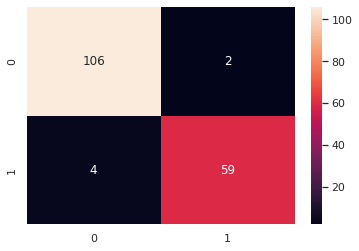

In [33]:
X_train_2 = rfe.transform(X_train)
X_test_2 = rfe.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=rseed)      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

## **2.2) Recursive feature elimination with cross validation and random forest classification**
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html>
Now we will not only **find best features** but we also find **how many features do we need** for best accuracy.

In [34]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=rseed) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=2,scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Optimal number of features : 30
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Original article said: best 11 features are **texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst** for best classification. Lets look at best accuracy with plot.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


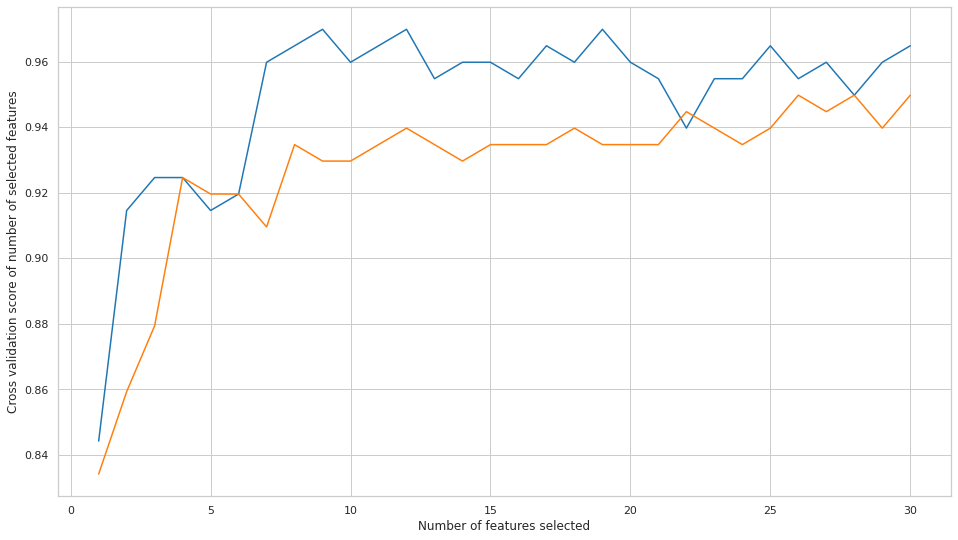

In [35]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

It was fairly easy to achieve above 90% accuracy (RF is amazing) due to the simply nature of the data. However, our first purpose is actually not finding good accuracy for training. Our purpose is learning how to do **feature selection and understanding data for increasing generalisation ability of models.** Last feature selection method is tree-based

Accuracy is:  0.9707602339181286


<AxesSubplot:>

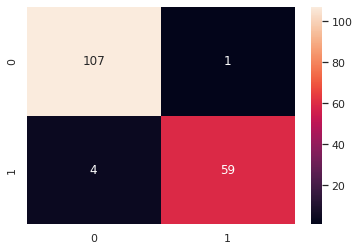

In [36]:
X_train_2 = rfecv.transform(X_train)
X_test_2 = rfecv.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=rseed)      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Better (lower) dimensionality, but still not better than kBest even though kBest is far simpler

## **3) Feature Importance: Tree based feature selection and random forest classification**
<http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>
In random forest classification method there is a **feature_importances_** attributes that is the feature importances (the higher, the more important the feature). **!!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**


Feature ranking:
concave points_mean :			 0.14201446883293575
perimeter_worst :			 0.12741037094034305
radius_worst :			 0.11567204977170874
concave points_worst :			 0.09299881331239508
area_worst :			 0.09078430180097924
concavity_mean :			 0.07293351456526811
area_mean :			 0.05356909781702634
area_se :			 0.02617405701912439
perimeter_mean :			 0.02549328551566998
radius_mean :			 0.025467999361238405
concavity_worst :			 0.025045735798868814
radius_se :			 0.024916827568390268
texture_worst :			 0.01990538286930559
compactness_worst :			 0.019846493075022634
symmetry_worst :			 0.01888072793478122
texture_mean :			 0.016544486373852155
perimeter_se :			 0.015269007817074649
smoothness_worst :			 0.011032777604910475
fractal_dimension_worst :			 0.010703346755913534
compactness_mean :			 0.00947299787452663
concavity_se :			 0.009033354968186585
smoothness_se :			 0.0068786402952838045
texture_se :			 0.0067920090721928375
smoothness_mean :			 0.005535844916387059
fractal_dimension

<BarContainer object of 30 artists>

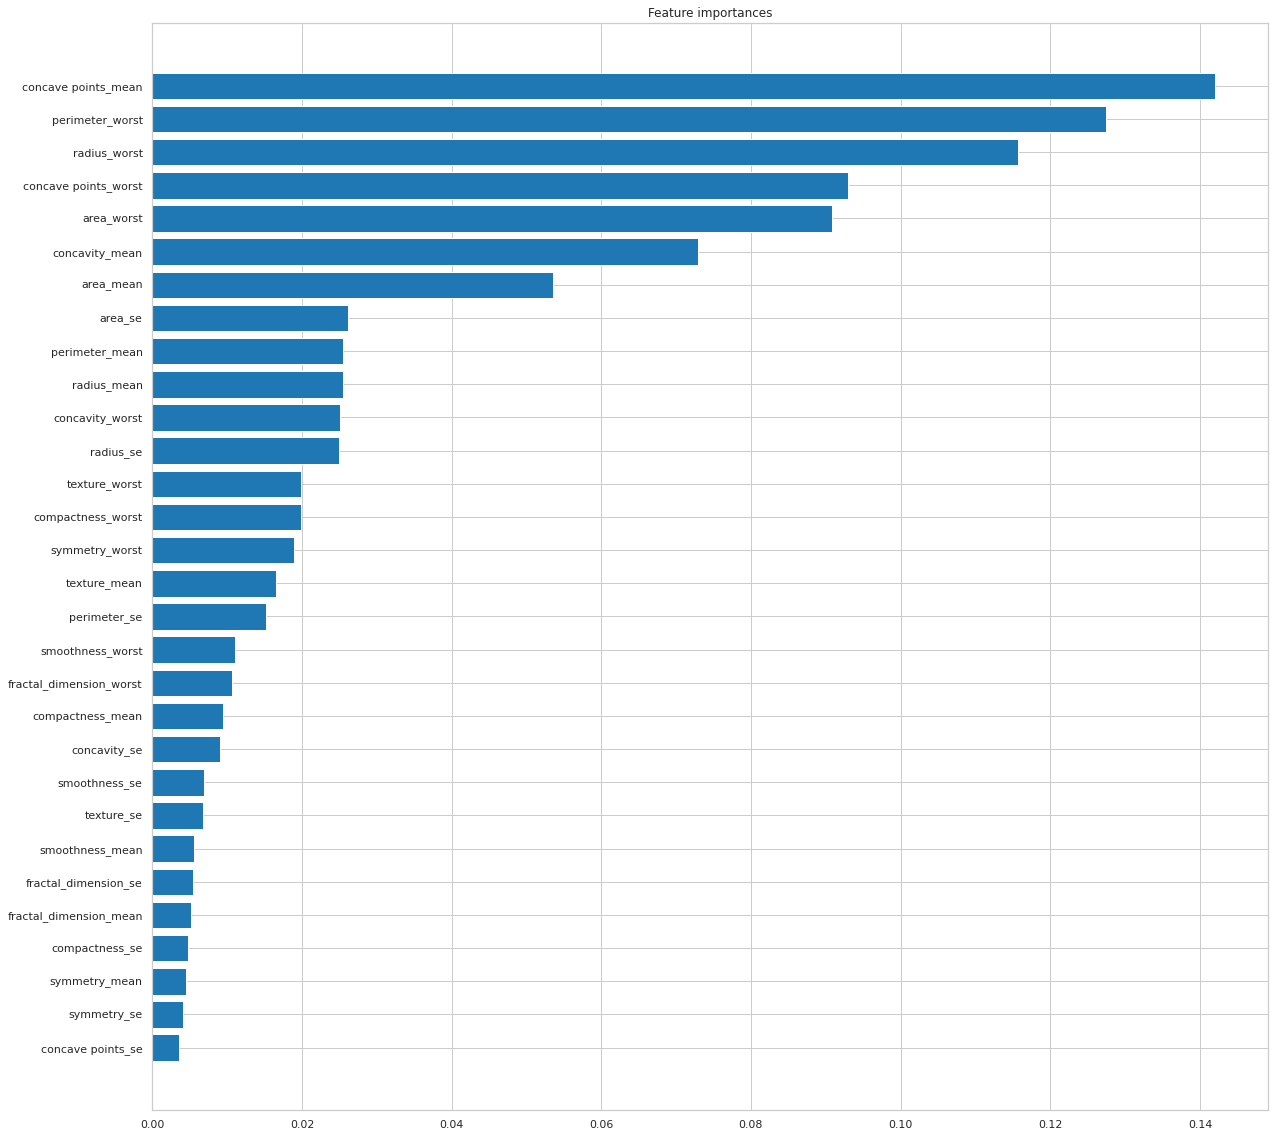

In [37]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X_train.columns.values[indices[f]], ":\t\t\t", importances[indices[f]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(20, 20))
plt.title("Feature importances")
plt.barh(X_train.columns.values[importances.argsort()], importances[importances.argsort()])


As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features. As I sad before, I give importance to understand features and find best of them. 

# **Feature Extraction**
<http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>
We will use principle component analysis (PCA) for dimensionality reduction. Before PCA, we need to normalize data for better performance of PCA.
 

## **Elbow method**: *for selecting components based on variance explained*

Text(0, 0.5, 'cumulative explained variance')

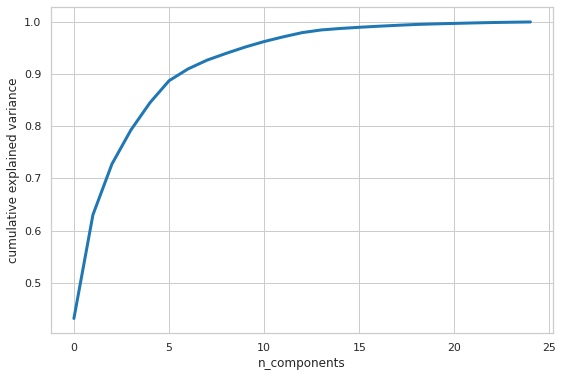

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25, whiten=True)
pca.fit(X_train_scaled)

plt.figure(figsize=(9, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=3)
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance')

### Always first **scale** since principal components are actually Eigen**vectors**


Accuracy is:  0.9707602339181286


<AxesSubplot:>

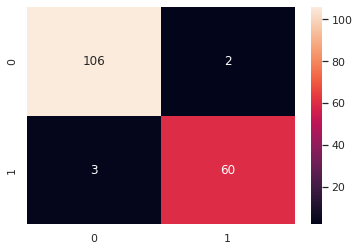

In [39]:
# Just like scaling you first fit to training set and then transform on both sets
pca = PCA(n_components=6, whiten=True)
pca.fit(X_train_scaled)
X_train_2 = pca.transform(X_train_scaled)
X_test_2 = pca.transform(X_test_scaled)

# #random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=rseed)      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### **PCA Result:** *Only 6 dimensions, wow!!*

## **PCA 2D plot:**: *allows the plotting of n-dimensions in 2 or 3 dimensions*

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.


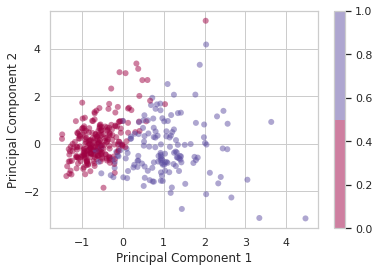

In [40]:
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=df_train['diagnosis'], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', len(y_train.unique())))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar() #pointless for <= 2 classes but lets anyway
plt.show()

# **CV scores and corresponding test accuracy**
### Here is a much better way to do find out which features + classifier yield the best results

### **Generalisation of models:** *the CV score gives us a much better indication on how well the model will perform on unseen data*

In [41]:
# You may even create your own metric, but use accuracy for ease:
score = 'accuracy'

# Implementation of different ML Algorithms
def models(clf, X_train, y_train, X_test, score):
#     clfs.append(('LR', LogisticRegression(max_iter=4200, random_state=rseed, C=0.5)))
#     clfs.append(('LDA', LinearDiscriminantAnalysis()))
#     clfs.append(('KNN', KNeighborsClassifier()))
#     clfs.append(('CART', DecisionTreeClassifier(random_state=rseed)))
#     clfs.append(('NB', GaussianNB()))
#     clfs.append(('SVM', SVC(random_state=rseed)))
#     clfs.append(('MLP', MLP(random_state=rseed)))
    
    # train set cv = 10
    k_fold = KFold(n_splits=10)
    cv_score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring=score)

    # now unseen test data
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    #todo: make the result list a df
    result = clf.__class__.__name__ , round(cv_score.mean()*100, 2), "±", round(cv_score.std()*100,2), "test:", round(accuracy_score(y_test, pred)*100,2)

    return (result)

### Try scaling and other subspace methods in pipeline


In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import cross_val_score, KFold

n_comp = 12
# Use a pipeline to combine things and only fit transform once for convenience
# scaler = make_pipeline(StandardScaler()).fit(X_train, y_train)
# scaler = make_pipeline(StandardScaler(), PCA(n_components=n_comp, whiten=True, random_state=rseed)).fit(X_train, y_train)
scaler = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=n_comp, random_state=rseed)).fit(X_train, y_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

models(RandomForestClassifier(random_state=rseed), X_train_sc, y_train, X_test_sc, score)

('RandomForestClassifier', 97.74, '±', 1.75, 'test:', 98.83)

## **NCA performs well...** *For homework:*
* Investigate whether UMAP and IsoMap are even better
* Investigate whether other classifiers work better
* Use a pipeline with a CV grid search to automate the **entire process** that gives you a sorted (neat) report of scores vs. methods 

# **Conclusion**
ML algorithms can be used for automated feature selection or extraction (dimensionality reduction), instead of manually picking features -- although this also has a place especially given time. Try this on other classification methods.


# **Upvote:** *Don't forget to upvote this notebook*